## Import Necessary Libraries

In [18]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [19]:
fraud_check_data=pd.read_csv('Fraud_check.csv')
fraud_check_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## Data Understanding

In [20]:
fraud_check_data.shape

(600, 6)

In [21]:
fraud_check_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [22]:
fraud_check_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

### Inference
* Number of features and records in the given data set is 6 and 600 respesctively

* There is no null values in the data set

* The categorical data can be converted into numeric data type by using encoder so that the model can learn the things more easily

## Data Preprocessing

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
fraud_check_data['Undergrad']=le.fit_transform(fraud_check_data['Undergrad'])
fraud_check_data['Marital.Status']=le.fit_transform(fraud_check_data['Marital.Status'])
fraud_check_data['Urban']=le.fit_transform(fraud_check_data['Urban'])
fraud_check_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [25]:
fraud_check_data.insert(6,'tax_category',' ')
fraud_check_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,0,2,68833,50047,10,1,
1,1,0,33700,134075,18,1,
2,0,1,36925,160205,30,1,
3,1,2,50190,193264,15,1,
4,0,1,81002,27533,28,0,
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,
596,1,0,69967,55369,2,1,
597,0,0,47334,154058,0,1,
598,1,1,98592,180083,17,0,


### Converting tax income to tax category of 0 and 1

In [28]:
for i in range(0,len(fraud_check_data['tax_category']),1):
    if fraud_check_data['Taxable.Income'][i]<=30000:
        fraud_check_data['tax_category'][i]='1'
    else:
        fraud_check_data['tax_category'][i]='0'

In [30]:
fraud_check_data['tax_category'].unique()

array(['0', '1'], dtype=object)

In [31]:
fraud_check_data['tax_category']=fraud_check_data['tax_category'].astype('int')

In [32]:
fraud_check_data.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int32
tax_category       int32
dtype: object

## Model Building

In [34]:
x=fraud_check_data.loc[:,('Undergrad','Marital.Status','City.Population','Work.Experience','Urban')]
y=fraud_check_data['tax_category']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

## Model Training

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

## Model Testing

In [37]:
y_pred_train=dt_model.predict(x_train)
y_pred_test=dt_model.predict(x_test)

## Model Evaluation

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,classification_report

In [39]:
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       103

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        99
           1       0.04      0.05      0.04        21

    accuracy                           0.62       120
   macro avg       0.41      0.39      0.40       120
weighted avg       0.65      0.62      0.63       120



In [40]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

1.0
0.6166666666666667


In [41]:
print(confusion_matrix(y_train,y_pred_train))
print(confusion_matrix(y_test,y_pred_test))

[[377   0]
 [  0 103]]
[[73 26]
 [20  1]]


<AxesSubplot:>

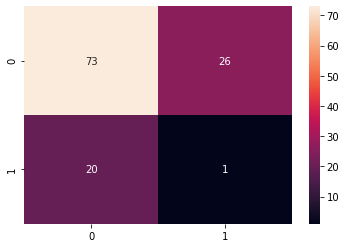

In [42]:
confusion_matrix_data=confusion_matrix(y_test,y_pred_test)
sns.heatmap(confusion_matrix_data,annot=True)

In [43]:
auc_train = roc_auc_score(y_train, y_pred_train)
print('auc value for train data',auc_train)
auc_test= roc_auc_score(y_test, y_pred_test)
print('auc value for test data',auc_test)

auc value for train data 1.0
auc value for test data 0.39249639249639245


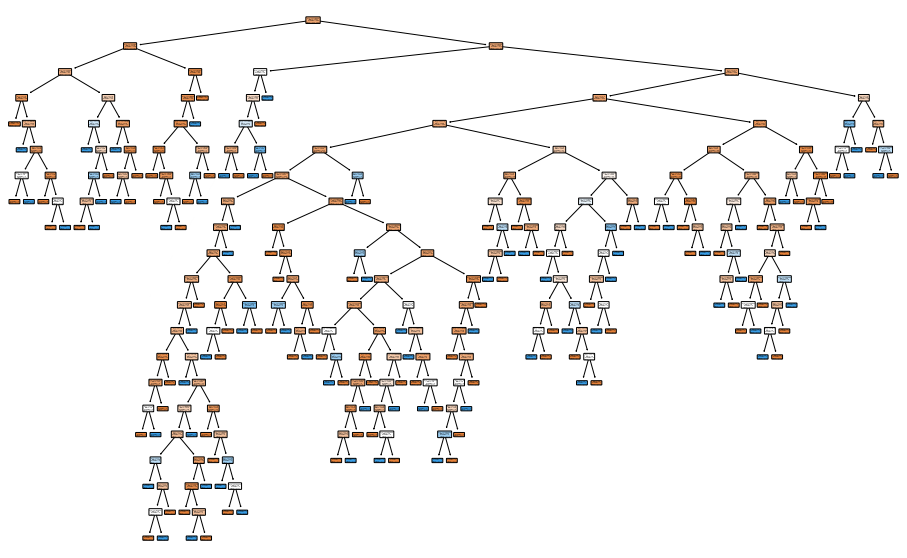

In [44]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dt_model,rounded=True,filled=True)
plt.show()

auc value for test data 0.39249639249639245


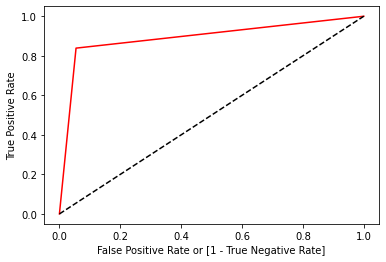

In [45]:
fpr, tpr, thresholds = roc_curve(y,dt_model.predict_proba (x)[:,1])

plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

auc_test= roc_auc_score(y_test, y_pred_test)
print('auc value for test data',auc_test)

### GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(estimator = dt_model,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4]})
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.7833333333333333


In [48]:
from sklearn.tree import DecisionTreeClassifier
dt_model_tweak=DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [49]:
dt_model_tweak.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [50]:
y_pred_train_tweak=dt_model_tweak.predict(x_train)
y_pred_test_tweak= dt_model_tweak.predict(x_test)

In [51]:
print(classification_report(y_test,y_pred_test_tweak))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        99
           1       0.00      0.00      0.00        21

    accuracy                           0.82       120
   macro avg       0.41      0.50      0.45       120
weighted avg       0.68      0.82      0.75       120



In [52]:
print(accuracy_score(y_test,y_pred_test_tweak))

0.825


In [53]:
auc_test= roc_auc_score(y_test, y_pred_test_tweak)
print('auc value for test data',auc_test)

auc value for test data 0.5


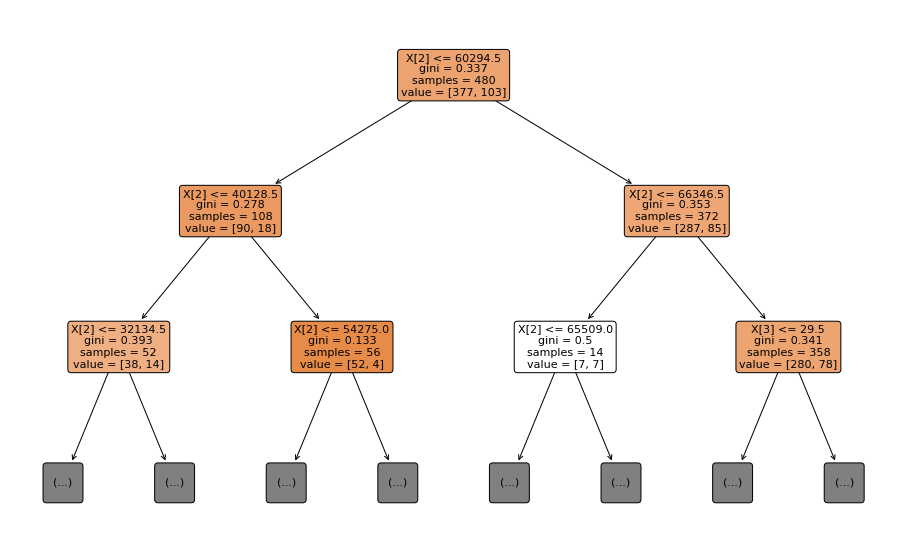

In [54]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dt_model,rounded=True,filled=True,max_depth=2)
plt.show()

auc value for test data 0.5


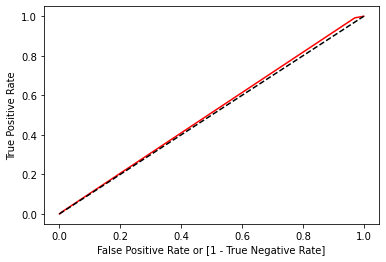

In [55]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y,dt_model_tweak.predict_proba (x)[:,1])

plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

auc_test= roc_auc_score(y_test, y_pred_test_tweak)
print('auc value for test data',auc_test)

### Check for imbalance data

In [57]:
fraud_check_data['tax_category'].value_counts()

0    476
1    124
Name: tax_category, dtype: int64

<AxesSubplot:xlabel='tax_category', ylabel='count'>

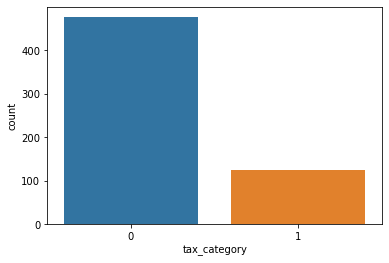

In [58]:
sns.countplot(fraud_check_data['tax_category'])

### Inference

* Countplot clearly shows that, the data are highly imbalanced, it may affect the accuaracy of the model

* It need to be balanced for obtaining best model

#### Data balancing by adjusting class weights

In [59]:
dt_model_imb=DecisionTreeClassifier(class_weight={0:1,1:5}).fit(x_train,y_train)

In [60]:
y_pred=dt_model_imb.predict(x_test)

In [61]:
print(accuracy_score(y_test,y_pred))

0.65


<AxesSubplot:>

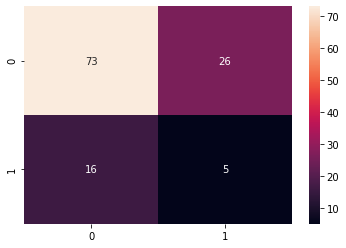

In [62]:
confusion_matrix_test=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix_test,annot=True)

#### Data balancing - SMOTE

In [63]:
!pip install imblearn

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
smote=SMOTE(sampling_strategy='minority')

In [66]:
x_sm,y_sm=smote.fit_resample(x,y)

In [67]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm=train_test_split(x_sm,y_sm,test_size=0.2)

In [68]:
dt_model_smote=DecisionTreeClassifier().fit(x_train_sm,y_train_sm)

In [69]:
y_pred_smote=dt_model_smote.predict(x_test_sm)

In [70]:
print(accuracy_score(y_test_sm,y_pred_smote))

0.6596858638743456


<AxesSubplot:>

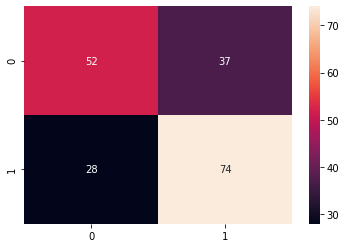

In [71]:
confusion_matrix_test=confusion_matrix(y_test_sm,y_pred_smote)
sns.heatmap(confusion_matrix_test,annot=True)

auc value for test data 0.6548799294998899


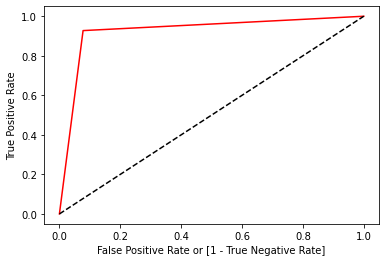

In [72]:
fpr, tpr, thresholds = roc_curve(y,dt_model_smote.predict_proba (x)[:,1])

plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

auc_test= roc_auc_score(y_test_sm, y_pred_smote)
print('auc value for test data',auc_test)

### Inference
* The result clearly shows that accuarcy gets improved by balancing the data